In [19]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')
from matplotlib.pyplot import imshow

In [20]:
import model
from model.captcha_cracker import CaptchaCracker

model_params_prefix = '/home/geetika/captcha/dataset_ssd/simpledataset_nvocab/captcha_models'
cracker = model.captcha_cracker.CaptchaCracker(model_params_prefix, multi_chars=False)

import os
from PIL import Image
import numpy
import random

image_dir = '/home/geetika/captcha/dataset_ssd/simpledataset'
import model
files = os.listdir(image_dir)


/home/geetika/captcha/dataset_ssd/simpledataset/1_43k4n.jpg
predicted_char= 4
[('4', 0.99999964), ('d', 3.6869793e-07), ('a', 2.0343054e-09), ('e', 1.0758133e-09), ('g', 1.0258496e-09), ('6', 8.1026258e-10), ('8', 6.6370531e-10), ('c', 2.9885086e-10), ('3', 1.7293357e-10), ('m', 4.0669249e-11), ('n', 2.5318376e-11), ('5', 1.880612e-11), ('x', 1.7347098e-11), ('2', 1.6303457e-11), ('w', 1.0724748e-11), ('f', 5.2184173e-12), ('k', 6.6463789e-13), ('p', 3.1995018e-13), ('7', 3.0413617e-13), ('l', 2.2868293e-13), ('s', 1.1706009e-13), ('y', 5.2742383e-14), ('z', 5.053201e-14), ('b', 4.3057836e-14), ('9', 2.8485667e-14), ('q', 2.1408765e-14), ('o', 2.058688e-14), ('i', 1.4410663e-14), ('v', 5.6801204e-15), ('h', 3.8801461e-15), ('t', 3.5045908e-15), ('0', 3.1414826e-15), ('j', 2.3965603e-15), ('u', 1.8098746e-15), ('unk', 1.6753871e-15), ('r', 9.8334755e-16), ('1', 6.5468595e-16)]


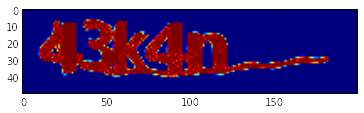

In [23]:
file_path = os.path.join(image_dir, random.choice(files))
print file_path

# Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))


predicted_char, char_probabilities = cracker.InferFromImagePath(file_path)
print 'predicted_char= {0}'.format(predicted_char)
print sorted([(char, prob) for char, prob in char_probabilities.iteritems()], key=lambda x: x[1], reverse=True)

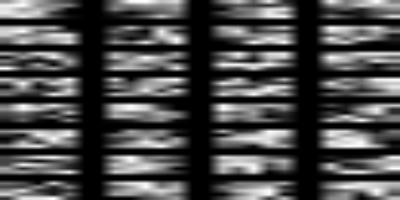

In [24]:
from model.captcha_cracker import GetLatestModelFile


latest_model_file = GetLatestModelFile(model_params_prefix)
model_params = numpy.load(latest_model_file)


import utils
from utils import tile_raster_images
from PIL import Image
from IPython.display import Image as IPyImage

im = Image.fromarray(
    tile_raster_images(model_params['arr_0'].reshape(32, 25), 
                       img_shape=(5, 5), 
                       tile_shape=(8, 4),
                       tile_spacing=(2, 2))
).resize((400, 200), Image.ANTIALIAS)
im.save("conv_weights.png")
IPyImage(filename="conv_weights.png")